## Assignment 1
### Name: Subhash Agrawal
### Roll Number: 23CS60R67

In [1]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import warnings

In [2]:
df = pd.read_csv('../../dataset/decision-tree.csv')
print(df.shape) 

(768, 9)


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Data Spliting

In [5]:
X = df.drop(['Outcome'], axis = 1)
y = df[['Outcome']]

In [6]:
X.shape, y.shape

((768, 8), (768, 1))

In [7]:
print(X,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [10]:
len(y_train)

614

# Defining Structure of Node

In [11]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):       
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

# Implementing Decision Tree

In [12]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=10):
        
        # initialize the root of the tree 
        self.root = None        
        # stopping conditions
        self.min_samples_split = min_samples_split
        
    def build_tree(self, dataset, curr_depth=0):
# Ffunction to build the tree recursively    
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
#         print(X.shape,Y.shape)
        
#         uniquey=len(np.unique(Y))
        # split until stopping conditions are met    
        if num_samples>=self.min_samples_split and len(np.unique(Y))!=1:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        # to find the best split        
        # to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        #Split the Data
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
    #to find info gain
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):       
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
        
    def calculate_leaf_value(self, Y):        
        Y = list(Y)
        return max(Y, key=Y.count)

    def fit(self, X, Y):
    #Train the tree
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def traverse(self, tree, sample):
        if tree is None:
            return None

        if tree.value is not None:
            return tree.value

        if tree.feature_index is not None and tree.threshold is not None:
            feature_index = tree.feature_index
            threshold = tree.threshold

            if float(sample[feature_index]) <= threshold:
                return self.traverse(tree.left, sample)
            else:
                return self.traverse(tree.right, sample)

        return None


# Print/Visualization of the Tree

In [13]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image, display  
import numpy as np

# Visualize the decision tree
def visualize_tree(tree, feature_labels, class_labels):
    dot_data = graphviz.Digraph(comment='Decision Tree', format='png', engine='dot', graph_attr={'size': '20,20'})
    
    def add_nodes(tree, dot_data):
        if tree.value is not None:
            dot_data.node(str(id(tree)), label=str(tree.value))
        else:
            feature_name = feature_labels[tree.feature_index] if tree.feature_index is not None else "Feature"
            threshold = str(tree.threshold) if tree.threshold is not None else ""
            info_gain = str(tree.info_gain) if tree.info_gain is not None else ""
            label = f"{feature_name}\n<= {threshold}\nInfo Gain: {info_gain}"
            dot_data.node(str(id(tree)), label=label)
            
            add_nodes(tree.left, dot_data)
            add_nodes(tree.right, dot_data)
            
            dot_data.edge(str(id(tree)), str(id(tree.left)), label="True")
            dot_data.edge(str(id(tree)), str(id(tree.right)), label="False")
    
    add_nodes(tree, dot_data)
    
    # Display the decision tree with a smaller size
    display(graphviz.Source(dot_data.source, filename="small_decision_tree", format="png"))

# Fitting the Training Model with Test Data (Training the model)

In [14]:
# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split=10)

# Fit the classifier on your training data
classifier.fit(X_train, y_train)



# Print the Tree

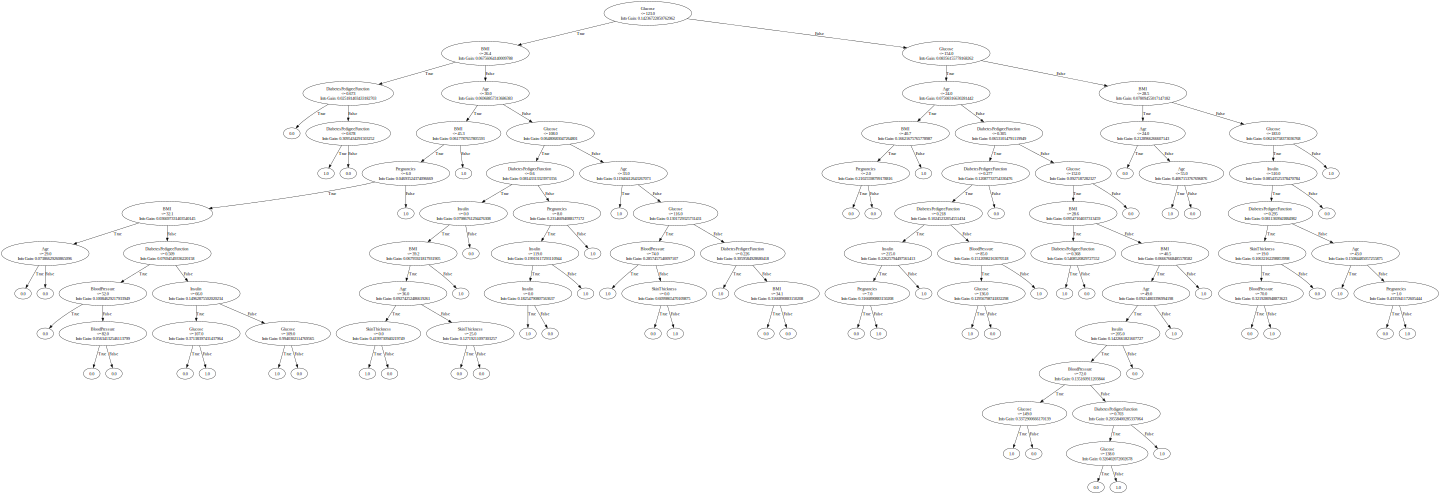

In [15]:

# Define your feature labels (replace with your actual feature labels)
feature_labels = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Define your class labels (replace with your actual class labels)
class_labels = ["No Diabetes", "Diabetes"]  # Replace with your actual class labels

#Print the tree
visualize_tree(classifier.root, feature_labels, class_labels)

# Implementing Reduced Error Pruning (Post-pruning)

In [16]:
def reduced_error_pruning(tree, X_val, y_val, max_depth=None):
    def traverse(tree, sample):
        if tree is None:
            return None

        if tree.value is not None:
            return tree.value

        if tree.feature_index is not None and tree.threshold is not None:
            feature_index = tree.feature_index
            threshold = tree.threshold

            if float(sample[feature_index]) <= threshold:
                return traverse(tree.left, sample)
            else:
                return traverse(tree.right, sample)

        return None

    if tree is None:
        return None

    if tree.value is not None:
        return tree  # Return the leaf node

    if tree.left is not None:
        tree.left = reduced_error_pruning(tree.left, X_val, y_val, max_depth=max_depth - 1)

    if tree.right is not None:
        tree.right = reduced_error_pruning(tree.right, X_val, y_val, max_depth=max_depth - 1)

    if tree is not None and tree.feature_index is not None and tree.threshold is not None:
        # Calculate the error without pruning
        y_pred_unpruned = [traverse(tree, row) for _, row in X_val.iterrows()]
        error_unpruned = np.mean(np.array(y_pred_unpruned) != np.array(y_val))

        if max_depth is not None and max_depth <= 0:
            # If maximum depth reached, prune by setting both left and right subtrees to None
            tree.left = None
            tree.right = None
        else:
            # Prune the subtree and calculate the error after pruning
            original_left = tree.left
            original_right = tree.right
            tree.left = None
            tree.right = None

            y_pred_pruned = [traverse(tree, row) for _, row in X_val.iterrows()]
            error_pruned = np.mean(np.array(y_pred_pruned) != np.array(y_val))

            # Compare errors and prune if error is reduced
            if error_pruned <= error_unpruned:
                return tree  # Return the pruned tree
            else:
                tree.left = original_left
                tree.right = original_right

    return tree


In [17]:
#VISUALIZE PRUNED TREE
def visualize_pruned_tree(tree, feature_labels, class_labels, dot=None):
    if dot is None:
        dot = graphviz.Digraph(comment="Decision Tree")
    
    if tree is not None:
        if isinstance(tree.value, int):  # Check if tree.value is an integer
            label = f"Class: {class_labels[int(tree.value)]}" if class_labels else f"Value: {tree.value}"
            dot.node(str(id(tree)), label=label)
        else:
            feature_name = feature_labels[tree.feature_index] if tree.feature_index is not None else f"Feature {tree.feature_index}"
            threshold = tree.threshold
            info_gain = tree.info_gain
            label = f"{feature_name}\n<= {threshold}\nInfo Gain: {info_gain}"
            dot.node(str(id(tree)), label=label)
            
            if tree.left is not None:
                dot.edge(str(id(tree)), str(id(tree.left)), label="True")
                visualize_pruned_tree(tree.left, feature_labels, class_labels, dot)
            else:
                dot.node(f"leaf_{str(id(tree))}_left", label="Leaf", shape="ellipse")
                dot.edge(str(id(tree)), f"leaf_{str(id(tree))}_left", label="True")
            
            if tree.right is not None:
                dot.edge(str(id(tree)), str(id(tree.right)), label="False")
                visualize_pruned_tree(tree.right, feature_labels, class_labels, dot)
            else:
                dot.node(f"leaf_{str(id(tree))}_right", label="Leaf", shape="ellipse")
                dot.edge(str(id(tree)), f"leaf_{str(id(tree))}_right", label="False")

    return dot


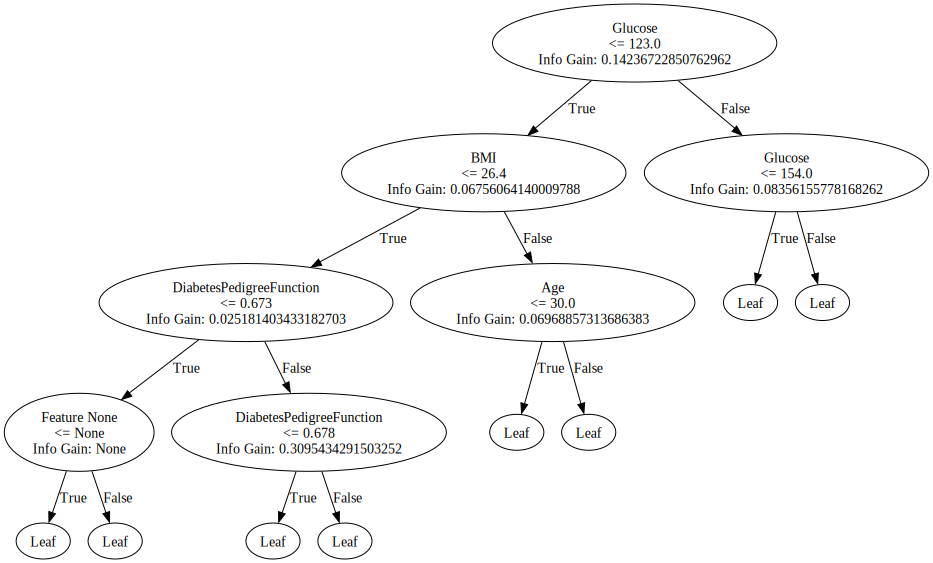

In [18]:
# # Perform reduced error pruning on the tree using X_test and y_test

# Create an instance of your DecisionTreeClassifier and fit it to your data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # Replace X_train and Y_train with your actual training data
clf.root = reduced_error_pruning(clf.root, X_test, y_test, max_depth=3)  # Prune the tree

# Create a new Dot object for visualization
dot = graphviz.Digraph(comment="Pruned Decision Tree")

# Visualize the pruned decision tree
visualize_pruned_tree(clf.root, feature_labels, class_labels, dot)

# Display the pruned decision tree
display(graphviz.Source(dot.source, filename="pruned_decision_tree", format="png"))



# # Visualize the pruned decision tree
# visualize_pruned_tree(classifier.root, feature_labels, class_labels)



# Graph/Plot of Depth vs Test Accuracy

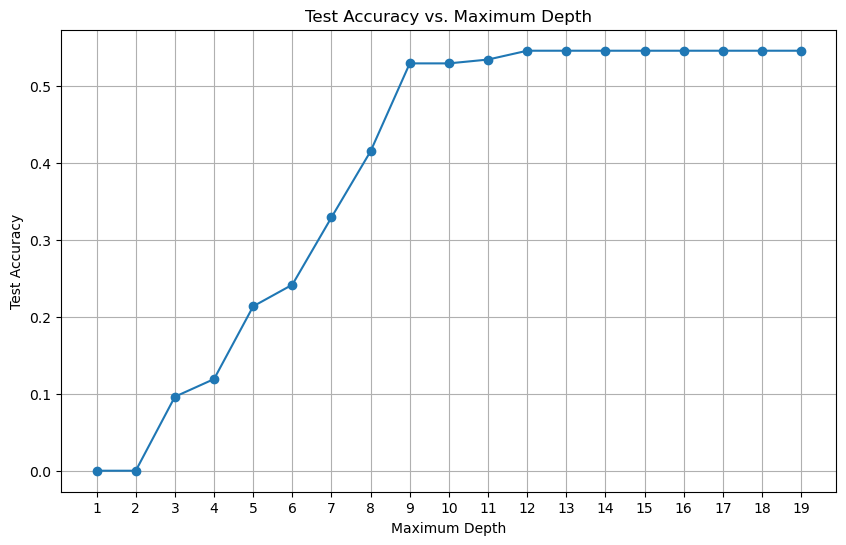

In [22]:
import matplotlib.pyplot as plt

# List to store test accuracies for different depths
test_accuracies = []

# Varying depths to test
depths = range(1, 20)  # You can adjust the range as needed

for max_depth in depths:
    # Create an instance of your DecisionTreeClassifier and fit it to your data
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    clf.root = reduced_error_pruning(clf.root, X_test, y_test, max_depth=max_depth)
    
    # Calculate test accuracy
    y_pred = [clf.traverse(clf.root, row) for _, row in X_test.iterrows()]
    test_accuracy = np.mean(np.array(y_pred) == np.array(y_test))
    test_accuracies.append(test_accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(depths, test_accuracies, marker='o')
plt.title('Test Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Test Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()


# Accuracy & Statistics : Accuracy, Precision & Recall

In [23]:
# Create an empty list to store predictions
predictions = []

# Iterate through each test case in X_test
for _, test_case in X_test.iterrows():  # Use _ to discard the index
    # Make a prediction for the current test case using the pruned decision tree
    prediction = classifier.traverse(classifier.root, test_case.to_numpy())  # Convert Series to NumPy array
    predictions.append(prediction)

# 'predictions' now contains the predictions for all test cases
predictions

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate macro accuracy
macro_accuracy = accuracy_score(y_test, predictions)

# Calculate macro precision
macro_precision = precision_score(y_test, predictions, average='macro')

# Calculate macro recall
macro_recall = recall_score(y_test, predictions, average='macro')

print("Macro Accuracy:", macro_accuracy)
print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)


Macro Accuracy: 0.6623376623376623
Macro Precision: 0.6377013322728177
Macro Recall: 0.623550401427297
